## SIRC - a modified SIR with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths)
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:<br>
$\frac{dS}{dt} = -\alpha S I$<br>,
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I$,<br>
$\frac{dC}{dt} = k I$.

## SIRSC - a SIR model without antigen and with explicit confirmed cases
This model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model): 
- **S** is *Succeptible*
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The major feature of this model is conversion of some or recovered back into succeptible.

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $r_s$ is the ratio of recovered people who are succeptible again,
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:
$\frac{dS}{dt} = -\alpha S I + r_s R$,<br>
$\frac{dI}{dt} = \alpha S I - \beta I$, <br>
$\frac{dR}{dt} = \beta I - r_s R$,<br>
$\frac{dC}{dt} = k I$.

## SEIRC - a modified SEIR with explicit confirmed cases
The second model is modified [SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model): 
- **S** is *Succeptible*
- **E** is *Exposed*, infected people, who are not yet infectious
- **I** is *Infectious*
- **R** is *Recovered* (and *diseased*)
- **C** is *Confirmed* individuals, both hospitalized and quorantined at home with a positive test

The model utilises three parameters: $\alpha$,$\beta$ and $k$:
- $\alpha$ models the speed of infection spread,
- $\beta$ represents the speed of recovery (and deaths),
- $e_r$ models how many exposed recover wthout becoming infectious,
- $e_i$ models how many exposed become infectious,
- $k$ is the reveal factor, how many infectious people are confirmed as positive.

The differential equations:<br>
$\frac{dS}{dt} = -\alpha S I$,<br>
$\frac{dE}{dt} = \alpha S I - (e_r + e_i) E$,<br>
$\frac{dI}{dt} = e_i E - \beta I - k I$, <br>
$\frac{dR}{dt} = e_r E + \beta I$,<br>
$\frac{dC}{dt} = k I$.


In [1]:
country  = 'Belarus'
country2 = 'Belarus'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
#import pymc as pm
from scipy.integrate import odeint
from concurrent import futures

%matplotlib inline

In [3]:
import corona

# SIRS model with confirmed cases

Progress: [####################] 100.0% 202.9975405829087


,alpha,beta,recovered to susceptible,reveal efficiency,Infected initial,Recovered initial,R0,Precision
0,0.73,0.568,0.00123,0.3,2400.0,8.2,1.28,203
1,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
2,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
3,0.73,0.568,0.00123,0.3,2400.0,0.7,1.28,203
4,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
5,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
6,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
7,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203
8,0.73,0.568,0.00123,0.3,2400.0,3.5,1.28,203
9,0.73,0.568,0.00123,0.3,2400.0,0.0,1.28,203


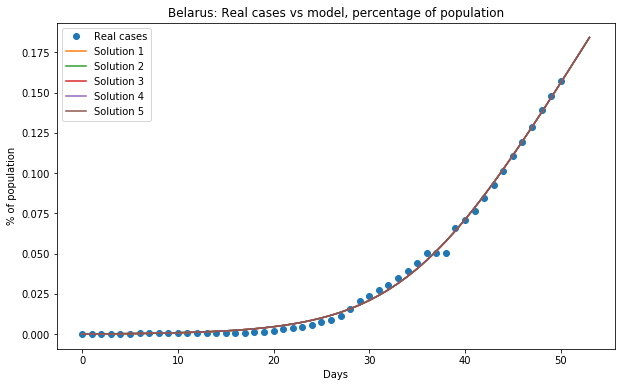

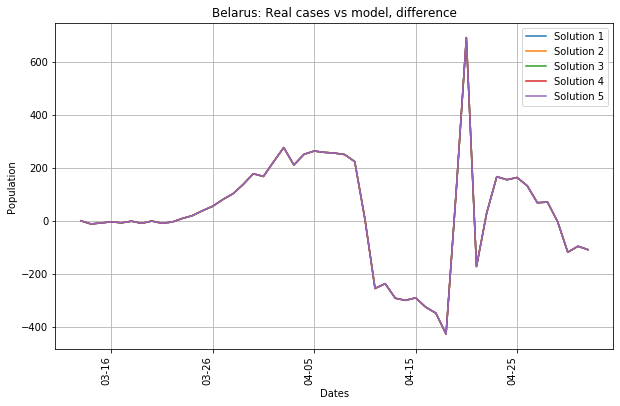

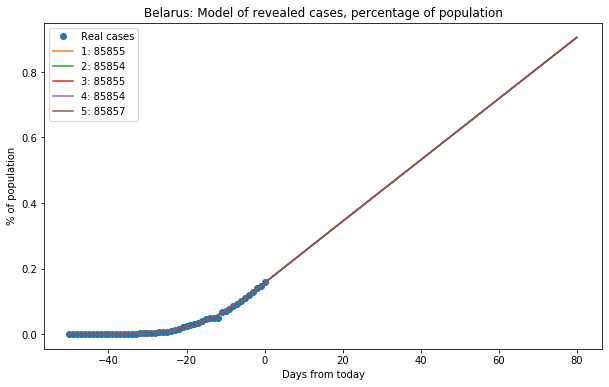

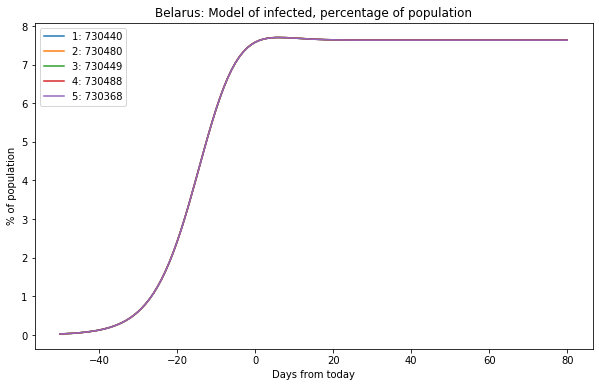

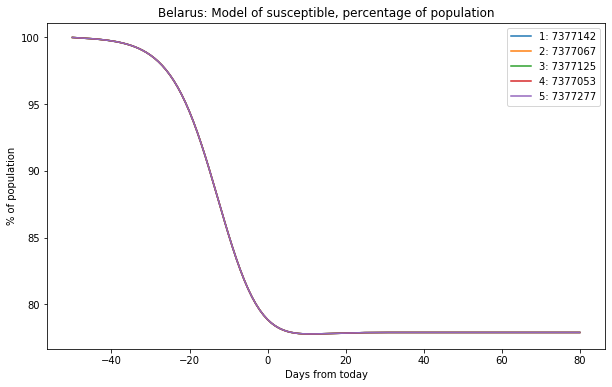

In [4]:
test_sirsc = corona.CovidModel(country, country2, model='sir_so_r0')
test_sirsc.run(500)

# SIR model with confirmed cases

In [5]:
test_sirc = corona.CovidModel(country, country2, model='sir_o_r0')

In [6]:
test_sirc.population, test_sirc.data[0]

(9483499.0,
 array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     1,     1,     1,     1,     1,     6,     6,     6,
            6,     6,     6,     9,     9,    12,    27,    27,    27,
           36,    36,    51,    51,    69,    76,    76,    81,    81,
           86,    86,    94,    94,    94,   152,   152,   163,   304,
          351,   440,   562,   700,   861,  1066,  1486,  1981,  2226,
         2578,  2919,  3281,  3728,  4204,  4779,  4779,  4779,  6264,
         6723,  7281,  8022,  8773,  9590, 10463, 11289, 12208, 13181,
        14027, 14917]))

Progress: [####################] 100.0% 216.9253507370252


,alpha,beta,reveal efficiency,Infected initial,Recovered initial,R0,Precision
0,0.472,0.325,0.00162,2400.0,321.3,1.46,217
1,0.472,0.325,0.00162,2400.0,205.4,1.46,217
2,0.472,0.325,0.00162,2400.0,221.0,1.46,217
3,0.472,0.325,0.00162,2400.0,0.0,1.46,217
4,0.472,0.325,0.00162,2399.9,0.0,1.46,217
5,0.472,0.325,0.00162,2399.8,143.2,1.46,217
6,0.472,0.325,0.00162,2399.8,0.0,1.46,217
7,0.472,0.325,0.00162,2399.7,454.0,1.46,217
8,0.472,0.325,0.00162,2399.7,0.0,1.46,217
9,0.473,0.325,0.00162,2399.5,0.0,1.46,217


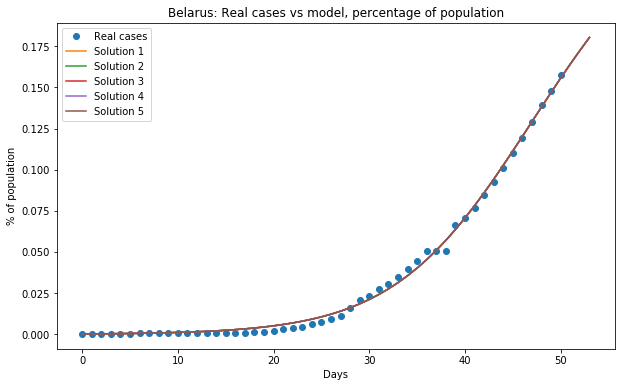

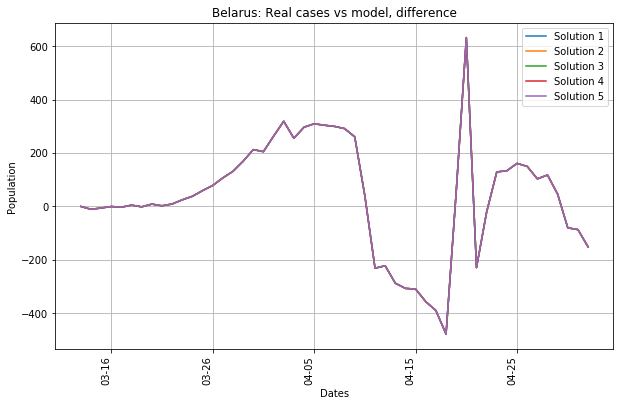

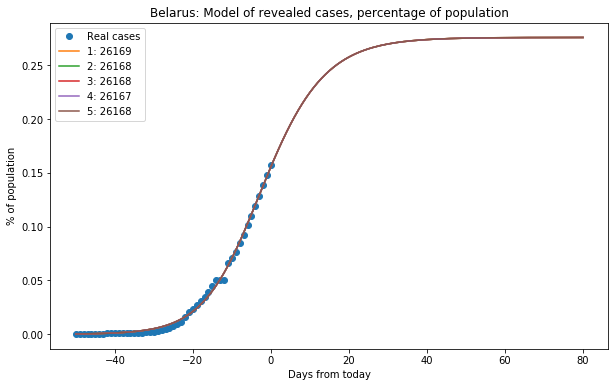

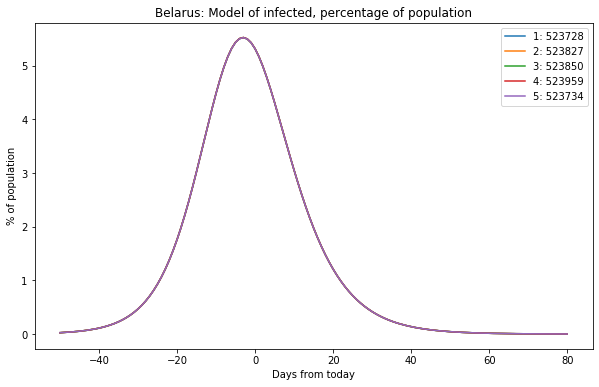

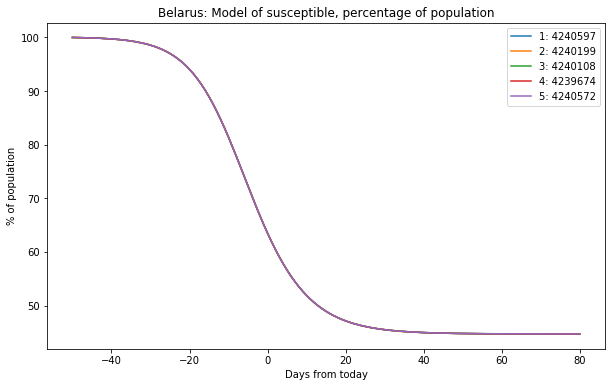

In [7]:
test_sirc.run(1000, figsize=(10, 6))


## SIR SCO with $k_c$

Progress: [####################] 100.0% 183.4387170222001


,alpha,beta,carrier efficiency,infectious to recovered,carrier recovery,recovered to susceptible,Infectious reveal efficiency,Carrier reveal efficiency,Initial infected,Initial carrier,Initial recovered,R0,Precision
0,2.39,3.46,0.433,0.877,0.157,0.567,1.79e-05,0.0013,604.3,520.0,1373.7,0.69,183
1,1.2,2.38,0.36,0.222,0.425,1.68,0.000622,0.00055,1762.9,2064.4,2246.9,0.505,196
2,2.14,3.33,0.933,0.798,0.823,0.91,1.58e-06,0.00582,1039.7,1748.6,241.9,0.644,197
3,2.09,2.45,0.726,0.713,1.84,2.62,3e-06,0.00758,1183.2,1745.7,41.3,0.852,197
4,2.59,2.66,0.659,0.92,1.33,1.86,0.0038,8.16e-07,99.7,1691.9,606.5,0.972,197
5,2.93,2.82,0.227,0.929,1.92,2.28,0.00393,0.00311,671.5,1796.8,1.3,1.04,198
6,2.16,2.15,0.558,0.883,1.77,1.57,0.00154,0.0124,916.3,1920.1,0.2,1,198
7,2.51,2.6,0.532,0.843,1.9,1.93,0.00154,0.0104,306.1,2085.7,761.1,0.963,198
8,2.38,2.28,0.297,0.902,2.29,1.53,0.00261,0.0113,734.9,1822.7,0.0,1.05,198
9,1.74,2.92,0.844,0.625,1.03,0.956,5.78e-07,0.00434,844.7,1745.7,525.7,0.596,198


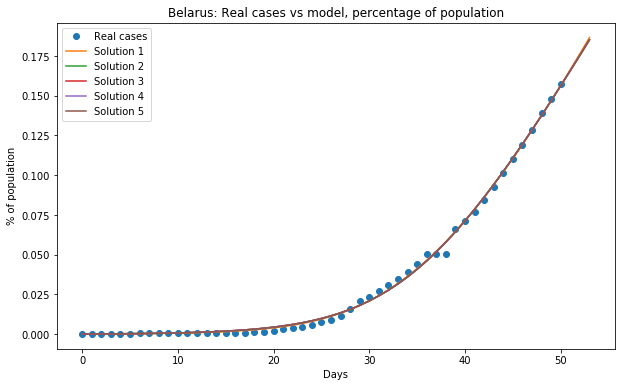

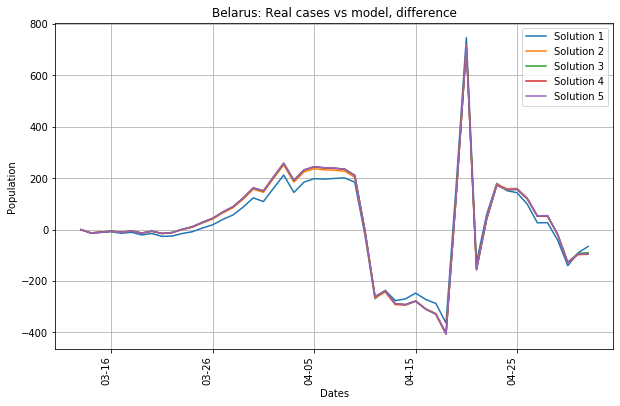

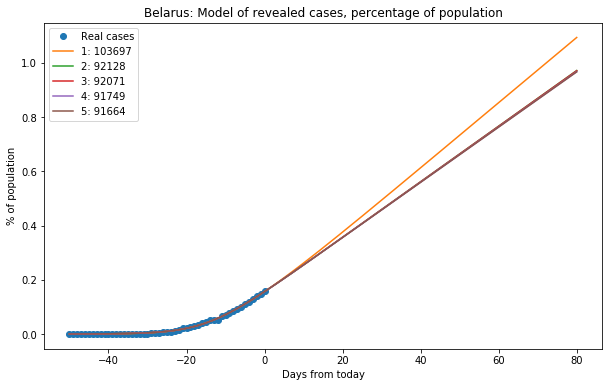

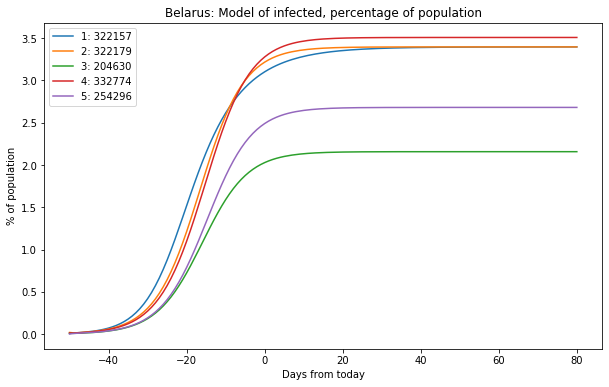

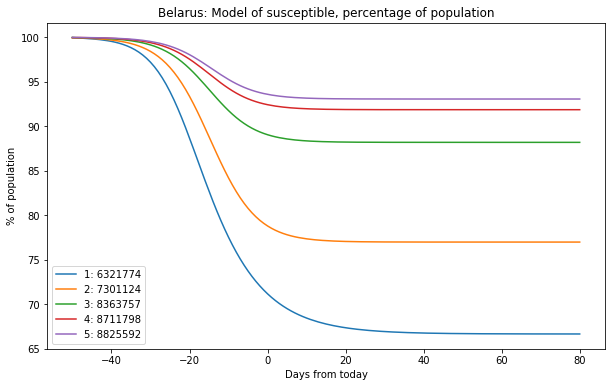

In [8]:
test_sir_sco_kc = corona.CovidModel(country, country2, model='sir_sco_kc')
test_sir_sco_kc.run(100)